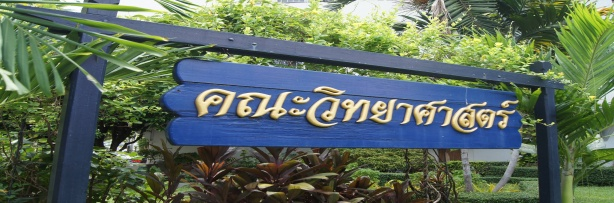

#### **<span style='color:Tomato;'> In Python, there are two primary modes for file processing: </span>**<span style='color:lightblue;'>  text mode and binary mode.</span> 
Understanding the differences between them is crucial for effective file handling.
1. **<span style='color:Tomato;'> Text File Processing:</span>**
- **Mode:** Opened using 'r' (read) or 'w' (write) mode without a 'b' in the mode string.
- **Data Handling:** Handles data as strings. This means the file content is automatically encoded and decoded (using a specified or default encoding, like UTF-8) during read and write operations.
- **Line Endings:** Automatically converts line endings (\n on Unix/Linux, \r\n on Windows) to just \n when reading, and converts \n back to the system's default line ending when writing. This is helpful for cross-platform consistency.
- **Use Case:** Ideal for handling text data like .txt, .csv, or .json files, where the content is meant to be read and interpreted as human-readable text.

In [1]:
contents = u"This is a binary file. นี่คือไบนารีไฟล์"
try:
    with open("./files/text_write.txt", "w", encoding="utf-8") as fp:
        fp.write(contents)
except Exception as e:
    print(e.__class__,e.args[1])

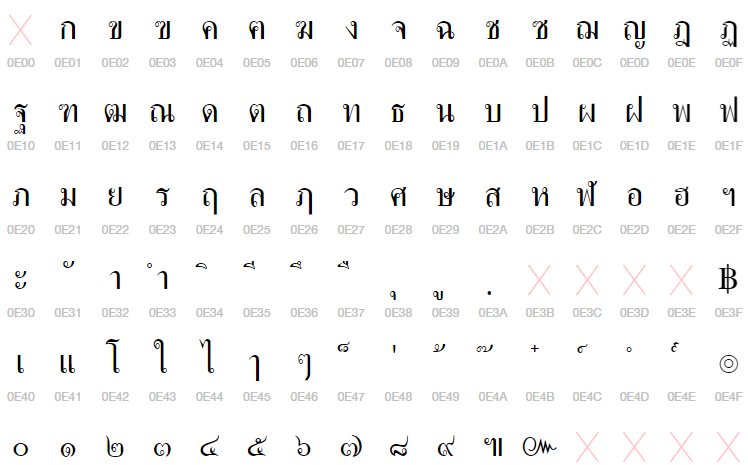

1. **<span style='color:Tomato;'>Binary File Processing:</span>**
- **Mode:** Opened using 'rb' (read binary) or 'wb' (write binary) mode.
- **Data Handling:** Treats data as a sequence of bytes. No encoding or decoding occurs, and the data is read or written exactly as it is. This is crucial for non-text data like images, audio files, or any file where the exact binary representation matters.
- **Line Endings:** Does not perform any conversion on line endings. Every byte is read or written as-is.
- **Use Case:** Essential for binary files like images (.jpg, .png), executables, or any file format where the structure is not purely text-based and requires specific byte-level handling.

#### Example: 1 (Write aplhabets in binary mode)

In [2]:
contents =  u"กขฃคงจฉ"
try:
    with open("./files/binary_write.bin", "wb") as fp:
        sentence = bytearray(contents, "utf-16")
        fp.write(sentence)
except Exception as e:
    print(e.__class__,e.args[1])

**<span style='color:Tomato;'>The bytearray type in Python:</span>**  is a mutable sequence of integers in the range 0 <= x < 256. It's used for dealing with binary data in scenarios where immutability of regular bytes objects is not desired.

#### Example: 2 (Write number in binary mode)

In [3]:
contents = [0, 3, 15, 128, 255]
try:
    with open("./files/numerics_write.bin", "wb") as fp:
        num = bytearray(contents)
        print(num)
        fp.write(num)
except Exception as e:
    print(e.__class__,e.args[1])

bytearray(b'\x00\x03\x0f\x80\xff')


#### <span style='color:Tomato;'>How to read Binary file</span>
#### Example: 1.1 (Read aplhabets in binary mode)

In [4]:
try:
    with open("./files/binary_write.bin", "rb") as fp:
        content = fp.read()
        print(content)
        string = content.decode('utf-16')

except Exception as e:
    print(e.__class__,e.args[1])
else:
    print(string)

b'\xff\xfe\x01\x0e\x02\x0e\x03\x0e\x04\x0e\x07\x0e\x08\x0e\t\x0e'
กขฃคงจฉ


#### Example: 2.1 (Read number in binary mode)

In [5]:
try:
    with open("./files/numerics_write.bin", "rb") as fp:
        contents = fp.read()
        list_content = list(contents)
except Exception as e:
    print(e.__class__,e.args[1])
else:
    print(contents)
    print(list_content)

b'\x00\x03\x0f\x80\xff'
[0, 3, 15, 128, 255]


#### Example: 3 (Write boolean in binary mode)

In [6]:
contents = [True,False,True]
try:
    with open("./files/boolean_write.bin", "wb") as fp:
        num = bytearray(contents)
        print(num)
        fp.write(num)
except Exception as e:
    print(e.__class__,e.args[1])

bytearray(b'\x01\x00\x01')


#### Example: 3.1 (Read boolean in binary mode)

In [7]:
try:
     with open("./files/boolean_write.bin", "rb") as fp:
        num = fp.read()
        print(num)
except Exception as e:
    print(e.__class__,e.args[1])
else:
    num = list(num)
    out = [bool(x) for x in num]
    print(num, out)
    

b'\x01\x00\x01'
[1, 0, 1] [True, False, True]


#### <span style='color:Tomato;'> Write array of decimal to binary file</span>
**<span style='color:Orange;'> Error Example</span>**

In [8]:
contents = [310, 283, 715, 128, 1255]
try:
    with open("./files/decimal_write.bin", "wb") as fp:
        num = bytearray(contents)
        fp.write(num)
except Exception as e:
    print(f"error is {e}")

error is byte must be in range(0, 256)


#### <span style='color:Tomato;'>How to slove above problem</span>
**<span style='color:Orange;'>Using array object instaed of Byte array object</span>**   
1. Array class from array module
2. Array class from numpy module

#### <span style='color:Tomato;'>Using array class from array module</span>
- array_object.tofile(file_object)

In [9]:
from array import array
contents = [310, 283, 715, 128, 1255]
try:
    with open("./files/array_module_write.bin", "wb") as file:
        num = array('i', contents)
        num.tofile(file)
except Exception as e:
    print(f"error is {e}")

#### <span style='color:Tomato;'>Using array class from numpy module</span>
- array_object.tofile(file_object)

In [10]:
import numpy as np
contents = [310, 283, 715, 128, 1255]
try:
    with open("./files/numpy_module_write.bin", "wb") as fp:
        num = np.array(contents, dtype='int')
        num.tofile(fp)
except Exception as e:
    print(f"error is {e}")

#### <span style='color:Tomato;'>Read Bytes from binary file</span>
**<span style='color:Orange;'>Array Module</span>**

In [11]:
try:
    with open("./files/array_module_write.bin", "rb") as fp:
        bytes = fp.read()
        arr = array('i')
        arr.frombytes(bytes)
except Exception as e:
    print(f"error is {e}")
else:
    print(arr)

array('i', [310, 283, 715, 128, 1255])


**<span style='color:Orange;'>Numpy Module</span>**

In [12]:
try:
    with open("./files/numpy_module_write.bin", "rb") as fp:
        bytes = fp.read()
        arr = np.frombuffer(bytes, dtype='int')
except Exception as e:
    print(f"error is {e}")
else:
    print(arr)

[ 310  283  715  128 1255]


#### <span style='color:Tomato;'>Read & write a list of decimal from/into binary file</span>

In [13]:
contents = [31.0, 2.83, 71.5, 1.28, 12.55]
try:
    with open("./files/array_module_write_decimal.bin", "wb") as fp:
        num = array('d', contents)
        num.tofile(fp)
except Exception as e:
    print(f"error is {e}")

In [14]:
try:
    with open("./files/array_module_write_decimal.bin", "rb") as fp:
        bytes = fp.read()
        arr = np.frombuffer(bytes, dtype='float')
except Exception as e:
    print(f"error is {e}")
else:
    print(arr)

[31.    2.83 71.5   1.28 12.55]


#### <span style='color:Tomato;'>Struct Module </span>
**<span style='color:Orange;'>Use the struct module</span>** to handle binary data, particularly when writing and reading integer and float values to and from a binary file. The struct module provides pack and unpack functions to efficiently convert between Python values and C structs represented as Python bytes objects.

#### <span style='color:Tomato;'>Write Binary file with Struct Module </span>

In [15]:
import struct
try:
    my_int1 = 123
    my_float1 = 45.67
    my_float2  =123.50
    my_int2 = 283
    my_string =b'python'
    with open('./files/struct_decimal.bin', 'wb') as file:
        struct_obj = struct.pack('iffi6s', my_int1, my_float1, my_float2, my_int2, my_string)
        file.write(struct_obj)
except Exception as e:
    print(f"error is {e}        {e.__class__}")

#### <span style='color:Tomato;'>Read Binary file and unpack Struct Module </span>

In [16]:
try:
   with open('./files/struct_decimal.bin', 'rb') as file:
        bytes = file.read()
        int1, float1, float2, int2, string1 = struct.unpack('iffi6s', bytes)
except Exception as e:
    print(f"error is {e}        {e.__class__}")
else:
    print( f"{int1},  {round(float1, 2)},  {round(float2, 2)},  {int2},   {string1}")

123,  45.67,  123.5,  283,   b'python'


#### <span style='color:Tomato;'>pickle module</span>

<b><span style='color:Orange;'>To write and read a list of object</span></b> to/from a binary file in Python, you can use the pickle module, which allows for serialization and deserialization of Python objects. 

#### <span style='color:Tomato;'> Writing a list of standard objects to a Binary File</span>
1. <b>Import</b> the pickle module.
2. <b>Create</b> a list of object.
3. <b>Open</b>  a file in binary write mode.
4. <b>Use pickle.dump()</b> to write the list of objects to the file.
5. <b>Close</b> the file

In [17]:
import pickle
try:
    data = [{'name': u'อลิซ', 'age': 30, 'gender':'F', 'salary':25000}, {'name': u'สมบัติ', 'age': 25,'gender':'M', 'salary':45000}, {'name': u'มานพ', 'age': 29,'gender':'M', 'salary':28500}]
    with open('./files/dict_record.bin', 'wb') as file:
        pickle.dump(data, file)
except Exception as e:
    print(f"error is {e}     {e.__class__}")

### <span style='color:Tomato;'>Reading Objects from a Binary File</span>
1. <b>Import</b> the pickle module.
2. <b>Open</b> the file in binary read mode.
3. <b>Use</b> pickle.load() to read the list of objects from the file.
4. <b>Close</b> the file.
5. <b>Use</b> the retrieved list of objects as needed.

In [18]:
try:
     with open('./files/dict_record.bin', 'rb') as file:
        data = pickle.load(file)
except Exception as e:
    print(f"error is {e}        {e.__class__}")
else:
    print(data)

[{'name': 'อลิซ', 'age': 30, 'gender': 'F', 'salary': 25000}, {'name': 'สมบัติ', 'age': 25, 'gender': 'M', 'salary': 45000}, {'name': 'มานพ', 'age': 29, 'gender': 'M', 'salary': 28500}]


####  <span style='color:Tomato;'>Writting and Reading Custom Objects from a Binary File</span>

In [19]:
class A(object):
    def __init__(self,a):
        self.a = a
class B(A):
    def __init__(self,a,b):
       A.__init__(self,a)
       self.b = b
class C(B):
    def __init__(self,a,b,c):
       super().__init__(a,b)
       self.c = c
    def __str__(self):
        return f"{self.a},  {self.b},  {self.c}"

####  <span style='color:Tomato;'>A list of Custom Object </span>

In [20]:
try:
    obj_list = [C(1,2,3), C(4.0,5.0,6.0), C('x','y','z'), C(True,False,False), C(11,12.0,False)] 
    with open('./files/custom_object_1.bin', 'wb') as file:
            pickle.dump(obj_list, file)
except Exception as e:
    print(e.__class__,e.args[1])

In [21]:
try:
    with open('./files/custom_object_1.bin', 'rb') as file:
        data = pickle.load(file)
except Exception as e:
    print(f"error is {e}        {e.__class__}")
else:
    for obj in data:
        print(obj)

1,  2,  3
4.0,  5.0,  6.0
x,  y,  z
True,  False,  False
11,  12.0,  False


####  <span style='color:Tomato;'>A list of Matrix Object </span>
- **<span style='color:Orange;'>Define a Matrix Class </span>**

In [22]:
import numpy as np
class Mat(object):
    def __init__(self, low, high):
        self.mat = np.random.randint(low, high, size=(3, 3))
    def __str__(self):
        return f"{self.mat}"

- **<span style='color:Orange;'>Write a binary file </span>**

In [23]:
try:
    alist = []
    for i in range(5):
        ob = Mat(5,26)
        alist.append(ob)
    with open("./files/Object_Matrix.bin", "wb") as file:
        pickle.dump(alist, file)
except Exception as e:
    print(e.__class__,e.args[1])

- **<span style='color:Orange;'>Read a binary file </span>**

In [24]:
try:
    with open('./files/Object_Matrix.bin', 'rb') as file:
        Mats = pickle.load(file)
except Exception as e:
    print(f"error is {e}        {e.__class__}")
else:
    for Mat in Mats:
        print(Mat)

[[ 5 21 22]
 [25 15 13]
 [ 9 23 16]]
[[20  5 12]
 [20 24 22]
 [18  6 20]]
[[25 22 13]
 [21 17 25]
 [ 9 20 22]]
[[21  5 15]
 [ 6 21 14]
 [14 19 23]]
[[19  8 20]
 [13  6 19]
 [18  8 13]]
